In [22]:
# # 초기 1회 실행
# from google.colab import drive
# drive.mount('/content/drive')

In [23]:
# 📥 데이터 다운로드 (Download Dataset)
# GitHub에서 csv 파일을 다운로드합니다.

!wget https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/wine.csv
!wget https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/mnist.csv
!wget https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/bank.csv

--2025-06-26 15:24:46--  https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/wine.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12300 (12K) [text/plain]
Saving to: ‘wine.csv.1’

wine.csv.1          100%[===================>]  12.01K  --.-KB/s    in 0s      

2025-06-26 15:24:46 (38.6 MB/s) - ‘wine.csv.1’ saved [12300/12300]

--2025-06-26 15:24:46--  https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/mnist.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18286445 (17M) [text/plain]
Saving

# Machine_Learning2_dimension_reduction

In [24]:
## 필요 패키지 설치 및 import
import importlib.util
import subprocess
import sys
def install_and_import(packages):
    for pkg in packages:
        package = pkg
        try:
            importlib.util.find_spec(package)
            print(f"{package} is already installed.")
        except ImportError:
            # 모듈이 설치되어 있지 않은 경우 설치시도
            print(f"{package} is not installed. Installing...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            subprocess.check_call(["conda", "install", package, "-y"])

            # 설치 후 다시 임포트를 시도
            importlib.import_module(package)
            print(f"{package} has been successfully installed.")

        # finally:
        #     globals()[package] = importlib.import_module(package)
        except Exception as e:
            # 설치 중 예외가 발생한 경우, 에러 메시지를 출력
            print(f"An error occurred while installing {package}: {str(e)}")

# 예시 사용법
install_and_import(['KneeLocator'])


KneeLocator is already installed.


In [25]:
## 필요 모듈 임포트
import os, sys, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



# 차원 축소

## PCA

#### 데이터 읽기

In [26]:
## 데이터 읽기
wine_data = pd.read_csv('wine.csv')
wine_data.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750,Wine B
1,13.52,3.17,2.72,23.5,97,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520,Wine C
2,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680,Wine A
3,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680,Wine B
4,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780,Wine C
5,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760,Wine A
6,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564,Wine B
7,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560,Wine C
8,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280,Wine A
9,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547,Wine A


In [27]:
df = wine_data.copy()


## 데이터 전처리: 종속 변수 'Class'와 독립 변수 분리
X = df.drop('Class', axis=1)
y = df['Class']

### 데이터 표준화

In [28]:
from sklearn.preprocessing import StandardScaler

## 데이터 표준화
# 센터링: 평균을 0으로 만들기
# 스케일링: 표준편차를 1로 만들기

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.42317975, -1.25173028, -0.02210113, ...,  0.2712923 ,
        -0.95658832,  0.01260473],
       [ 0.64661865,  0.75824885,  1.28661644, ..., -0.29692153,
        -0.77221682, -0.71839723],
       [ 0.29904702,  1.48833096, -0.276574  , ..., -0.60288283,
         0.56093095, -0.20987413],
       ...,
       [-0.08576443,  0.43376792,  1.21390991, ..., -0.82142661,
        -0.41765624, -0.46413568],
       [ 0.3983532 ,  0.82134237,  0.0506054 , ..., -1.78301925,
        -1.39624343, -0.30522221],
       [-0.78090769, -1.1345566 , -0.96728605, ...,  0.35870982,
         0.23473522, -0.27343952]])

### PCA 적용

In [29]:
from sklearn.decomposition import PCA

##  PCA 적용
pca = PCA() # n_components는 주성분의 개수, 기본값은 데이터의 모든 변수를 사용하여 변환

pca_result = pca.fit_transform(X_scaled) # 이론적으로는 센터링만 해도 되지만..일반적으로는 표준화 데이터 사용!

pca_result

array([[-0.8074307 , -0.24050715, -0.68538342, ...,  0.09977638,
        -0.97025068, -0.28630402],
       [-2.97997481,  0.44396556,  0.95097511, ..., -0.40789026,
        -0.21403676, -0.27938544],
       [ 0.46734845,  0.35515359, -0.21470646, ..., -0.07175962,
        -0.04428562,  0.20305864],
       ...,
       [-2.76935915,  0.23596367,  0.61453456, ..., -0.48252182,
         0.08567833, -0.38905263],
       [-2.819409  ,  1.5234207 , -0.47189295, ...,  0.17244468,
        -0.17100858, -0.23267431],
       [ 2.28481877, -1.39161502, -0.23884023, ...,  0.56885971,
        -0.63986916,  0.30053159]])

In [30]:
## 결과 확인
# PCA 결과를 데이터프레임으로 변환하여 확인
pca_df = pd.DataFrame(pca_result,
                                                  columns=[f'PC_{i+1}' for i in range(X.shape[1])])
pca_df['Class'] = y ## 선택
pca_df

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,Class
0,-0.807431,-0.240507,-0.685383,-2.491034,-0.601311,0.271299,0.366253,-1.234595,-1.023547,-0.276235,0.099776,-0.970251,-0.286304,Wine B
1,-2.979975,0.443966,0.950975,-1.010152,-0.628841,1.235922,-0.222034,0.313301,-0.457100,-0.248892,-0.407890,-0.214037,-0.279385,Wine C
2,0.467348,0.355154,-0.214706,1.408140,0.331637,1.057359,0.593236,-0.580698,-0.274094,0.044280,-0.071760,-0.044286,0.203059,Wine A
3,-1.068777,-1.823793,0.960393,-0.290614,-0.752980,-0.055796,0.093453,-0.311964,0.931926,-0.262288,0.347458,0.110589,0.013992,Wine B
4,-2.281343,0.328763,-0.965988,-0.370492,-0.359646,0.916698,-0.964600,0.149438,0.331742,-0.884637,0.000519,0.254231,-0.286339,Wine C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,3.109248,0.839691,-0.351530,-0.051970,0.991931,0.116030,0.257919,-0.189923,-1.271892,-0.412326,-0.567508,0.566856,-0.040818,Wine A
172,-0.830673,-2.462999,-1.526003,-0.834838,0.717546,-0.129635,0.426320,-0.066971,0.157481,0.983448,-0.014813,0.566454,0.271452,Wine B
173,-2.769359,0.235964,0.614535,-0.856145,-0.587425,0.730705,0.009286,-0.435891,0.249085,-0.662735,-0.482522,0.085678,-0.389053,Wine C
174,-2.819409,1.523421,-0.471893,0.647804,-0.261236,-0.532656,-0.449587,-0.124473,-0.046001,-0.044736,0.172445,-0.171009,-0.232674,Wine C


#### Scree plot

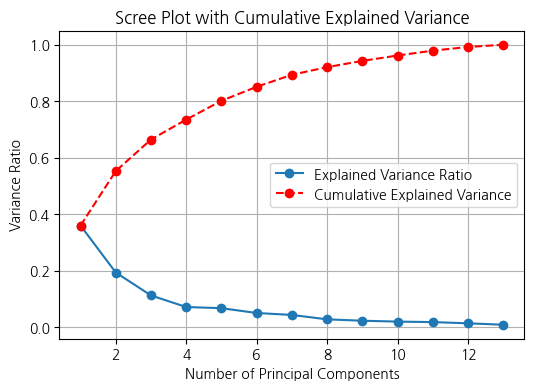

In [31]:
## Scree plot 및 분산 비율 확인

plt.figure(figsize=(6, 4))

# 설명된 분산 비율 플롯
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
                pca.explained_variance_ratio_,
                marker='o',
                label='Explained Variance Ratio')

# 누적 분산 비율 계산 및 플롯
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1),
                 cumulative_variance,
                 marker='o',
                 linestyle='--',
                 color='r',
                 label='Cumulative Explained Variance')

plt.title('Scree Plot with Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Ratio')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [32]:
var_df = pd.DataFrame([cumulative_variance, pca.explained_variance_ratio_],
                                                  index = ['Cumulative Explained Variance', 'Explained Variance Ratio'])
var_df.columns = ['PC_' +str(i+1) for i in range(X.shape[1])]
var_df

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13
Cumulative Explained Variance,0.359361,0.552335,0.664110,0.734771,0.801417,0.850926,0.893579,0.920612,0.942710,0.961764,0.979052,0.992005,1.000000
Explained Variance Ratio,0.359361,0.192975,0.111775,0.070661,0.066647,0.049508,0.042654,0.027032,0.022098,0.019054,0.017288,0.012953,0.007995


#### 변수 기여도 확인

In [33]:
## PC 별 변수 기여도 확인
# 각 변수의 기여도를 나타내는 loading scores 계산
loading_scores = pd.DataFrame(pca.components_.T,
                                                                   index = X.columns,
                                                                   columns = [f'PC_{i+1}' for i in range(X.shape[1])])
rotated_df = loading_scores

rotated_df

# PC1 = 0.134596*Alcohol -0.246137*Malic acid ...

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13
Alcohol,0.134596,0.485955,-0.211791,-0.015377,-0.268512,0.220180,-0.055197,0.392727,-0.486285,-0.223631,-0.289454,-0.228833,0.012237
Malic acid,-0.246137,0.228514,0.081172,0.523509,0.054011,0.542519,0.430608,0.057080,0.060703,0.299291,0.128204,0.100757,0.027842
Ash,-0.004955,0.316001,0.622500,-0.209586,-0.155874,0.151496,-0.147171,-0.170888,0.329594,0.114138,-0.476693,-0.039577,-0.141827
Alcalinity of ash,-0.236481,-0.011626,0.615146,0.070729,0.053488,-0.090257,-0.288921,0.428010,-0.217632,-0.123875,0.454629,-0.069799,0.092685
Magnesium,0.132077,0.299183,0.143991,-0.366408,0.722972,0.025043,0.310848,-0.151667,-0.271621,-0.105086,0.040881,0.075936,0.053417
Total phenols,0.396148,0.074826,0.140738,0.198293,-0.141192,-0.079036,-0.021187,-0.408660,-0.326556,0.245257,0.313647,-0.325463,-0.462188
Flavanoids,0.425028,0.006312,0.145939,0.152129,-0.104166,-0.015454,-0.056225,-0.189299,-0.063842,0.158893,-0.012213,-0.045491,0.832613
Nonflavanoid phenols,-0.299059,0.022455,0.169503,-0.189193,-0.502524,-0.263402,0.594226,-0.234169,-0.182885,-0.245514,0.080396,0.051558,0.113305
Proanthocyanins,0.312717,0.044691,0.148546,0.407880,0.140876,-0.530058,0.366141,0.371322,0.220139,-0.092747,-0.247969,-0.082190,-0.117150
Color intensity,-0.097959,0.525147,-0.136425,0.075395,-0.078038,-0.414613,-0.229522,-0.037866,-0.069649,0.301375,0.094960,0.594405,-0.014390


#### Bi plot

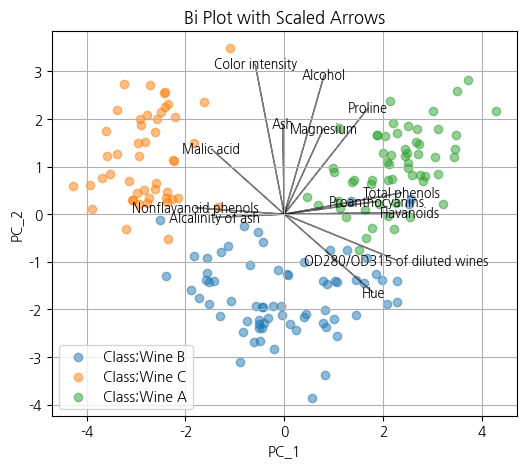

In [34]:
##  Bi Plot
# Bi Plot을 다시 생성하여 변수 화살표의 길이를 조정
plt.figure(figsize=(6, 5))
colors = ['r', 'g', 'b']  # Class 변수에 따른 색상

# 데이터 포인트를 그리기
for i, target in enumerate(pca_df['Class'].unique()):
    plt.scatter(pca_df.loc[pca_df['Class'] == target, 'PC_1'],
                           pca_df.loc[pca_df['Class'] == target, 'PC_2'],
                           label = 'Class;' + str(target),
                           alpha = 0.5,
                          # color = colors[i],
                          # c = 'C0'
                )

plt.xlabel('PC_1')
plt.ylabel('PC_2')

# 변수 기여도 화살표 추가 (길이 조정)
scaling_factor =6  # 화살표 길이를 조정하는 스케일링 팩터
for i, (var, pc1, pc2) in enumerate(zip(X.columns, pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0,
                        pc1 * scaling_factor,
                        pc2 * scaling_factor,
                        color = 'black',
                        alpha = 0.5)
    plt.text(pc1 * scaling_factor,
                    pc2 * scaling_factor,
                        var,
                        ha='center',
                        va='center',
                        fontsize=9)

plt.title('Bi Plot with Scaled Arrows')
plt.legend()
plt.grid()
plt.show()


- 주성분과 변수벡터 별
  - 각 변수들은 크게 5그룹으로 묶을 수 있음
    - 1그룹(OD280/OD315.of.diluted.wines, Hue)
    - 2그룹(Flavanoids,Proanthocyanins, Total.phenols)
    - 3그룹(Alcohol, Magnesium, Proline)
    - 4그룹(Ash, Color.intensity)
    - 5그룹(Malic.acid, Nonflavanoid.phenols)

 - 5그룹은 PC1과 강한 양의 상관성을 지님, 1,2그룹은 PC1와 강한 음의 상관성을 지님
 - 이때 각 그룹 안에서는 positively correlated되어 있음(변수들의 각도가 같은 방향으로 작은 경우)
 -반대로 그룹1과 그룹2는 negatively correlated되어 있음(변수들의 각도가 반대방향인 경우)
 - Magnesium 변수와 Malic.acid 변수는 거의 correlation이 없음(변수들의 각도가 수직인 경우)

- 관측치별
  - 그룹별(Y값이 있는 경우)
     - WineA는 다른 wine에 비해서 그룹2,3 변수들이 큼
     - WineB는 다른 wine에 비해서 그룹1, 3, 4 변수들이 작은 편
     - 그룹3,4 변수만으로 wine A,C VS B 구분 가능(PC2)
     - 이후에 그룹 2,5 변수로 wine A VS C 구분 가능(PC1)

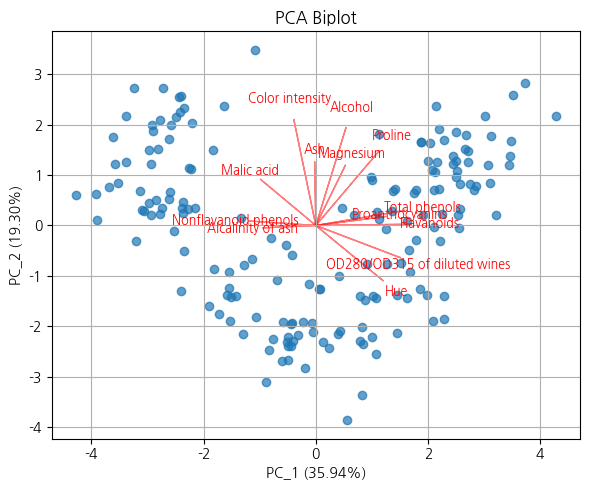

In [35]:
### 참고
def create_pca_biplot(pca_result,
                                              pca,
                                              original_data,
                                              feature_names,
                                              labels = None,

                                              figsize=(8, 6),
                                              scaling_factor=4,
                                              point_alpha=0.7,
                                              arrow_color='red',
                                              arrow_alpha=0.5,
                                              label_fontsize=8,
                                              feature_fontsize=9):
    """
    PCA 결과를 바탕으로 Biplot을 생성

    Parameters:
    - pca_result: PCA 변환 결과 (n_samples, n_components)
    - pca: 학습된 PCA 객체
    - original_data: 원본 데이터 DataFrame
    - labels: 각 데이터 포인트의 레이블
    - feature_names: 특성(변수) 이름 리스트
    - figsize: 그래프 크기 (기본값: (10, 8))
    - scaling_factor: 화살표 길이 조정 factor (기본값: 4)
    - point_alpha: 데이터 포인트 투명도 (기본값: 0.7)
    - arrow_color: 화살표 색상 (기본값: 'red')
    - arrow_alpha: 화살표 투명도 (기본값: 0.5)
    - label_fontsize: 레이블 폰트 크기 (기본값: 8)
    - feature_fontsize: 특성 이름 폰트 크기 (기본값: 9)

    Returns:
    - None (플롯을 화면에 표시)
    """
    plt.figure(figsize=figsize)

    # 데이터 포인트 그리기
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=point_alpha)

    # 레이블 표시
    if labels is not None:
      for i, label in enumerate(labels):
          plt.annotate(label, (pca_result[i, 0], pca_result[i, 1]), fontsize=label_fontsize)

    # 변수 기여도 화살표 추가
    for i, (var, pc1, pc2) in enumerate(zip(feature_names, pca.components_[0], pca.components_[1])):
        plt.arrow(0, 0, pc1 * scaling_factor, pc2 * scaling_factor,
                            color = arrow_color,
                            alpha = arrow_alpha)
        plt.text(pc1 * scaling_factor * 1.2,
                        pc2 * scaling_factor * 1.2, var,
                          color = arrow_color,
                          ha = "center",
                          va = "center",
                          fontsize = feature_fontsize)

    plt.xlabel(f"PC_1 ({pca.explained_variance_ratio_[0]:.2%})")
    plt.ylabel(f"PC_2 ({pca.explained_variance_ratio_[1]:.2%})")
    plt.title('PCA Biplot')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


create_pca_biplot(
                  pca_result = pca_result,
                  pca = pca,
                  original_data = X,
                  labels = None,
                  feature_names = X.columns,
                  scaling_factor = 4,
                  figsize = (6, 5),

)



#### 시각화

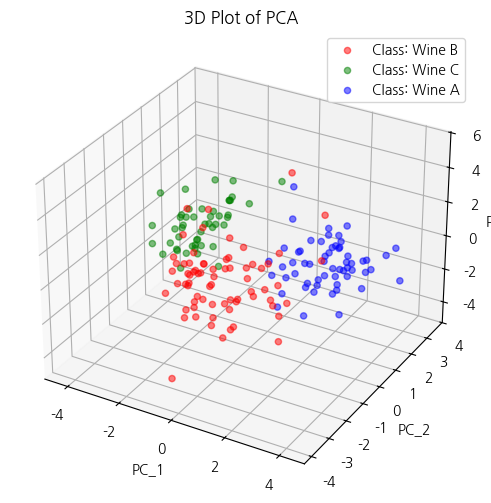

In [36]:
from mpl_toolkits.mplot3d import Axes3D

## 3D Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for i, target in enumerate(pca_df["Class"].unique()):
    ax.scatter(pca_df.loc[pca_df["Class"] == target, "PC_1"],
                          pca_df.loc[pca_df["Class"] == target, "PC_2"],
                          pca_df.loc[pca_df["Class"] == target, "PC_3"],
                          label = "Class: " + target,
                          alpha = 0.5,
                          color = colors[i])

ax.set_xlabel("PC_1")
ax.set_ylabel("PC_2")
ax.set_zlabel("PC_3")
plt.title("3D Plot of PCA")
plt.legend()
plt.show()


In [37]:
import plotly.graph_objects as go
import plotly.express as px

## 3d Scatter Plot 생성
fig = px.scatter_3d(
    pca_df,
    x = "PC_1",
    y = "PC_2",
    z = "PC_3",
    color = "Class",
    title = "3D Plot of PCA with Variable Arrows (Interactive)",
    labels = {"PC1": "PC_1", "PC2": "PC_2", "PC3": "PC_3"},
    opacity = 0.7
)

## 변수 화살표 추가 (Biplot 화살표)
scaling_factor = 6  # 화살표 길이 조정
for i, (var, pc1, pc2, pc3) in enumerate(zip(X.columns, pca.components_[0], pca.components_[1], pca.components_[2])):
    fig.add_trace(
        go.Scatter3d(
            x = [0, pc1 * scaling_factor],
            y = [0, pc2 * scaling_factor],
            z = [0, pc3 * scaling_factor],
            mode = 'lines+text',
            text = [None, var],  # 화살표 끝에 텍스트 그리기
            textposition = 'top right',  # 텍스트를 화살표 끝에 배치
            line = dict(color = 'black', width = 2),
            showlegend = False
        )
    )

# 그래프를 반응형으로 출력
fig.show()


#### 새로운 데이터에 적용하기

In [38]:
new_data = pd.DataFrame({
    'Alcohol': [13.56],  # 각 값을 리스트로 감쌉니다.
    'Malic acid': [0.97],
    'Ash': [2.31],
    'Alcalinity of ash': [17.0],
    'Magnesium': [100],
    'Total phenols': [2.33],
    'Flavanoids': [1.32],
    'Nonflavanoid phenols': [0.55],
    'Proanthocyanins': [0.42],
    'Color intensity': [3.17],
    'Hue': [1.02],
    'OD280/OD315 of diluted wines': [1.93],
    'Proline': [720]
})

new_data

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.56,0.97,2.31,17.0,100,2.33,1.32,0.55,0.42,3.17,1.02,1.93,720


In [39]:
## 새로운 데이터에 대한 PCA 적용: 회전!
# 새로운 데이터가 들어왔을 때 기존 PCA 모델을 사용하여 변환

new_data_scaled = scaler.transform(new_data) # 기존 학습 데이터로 학습된 스케일러 scaler를 이용해야함!!

new_data_pca = pca.transform(new_data_scaled) # 기존 학습 데이터로 학습된 PCA 모델 pca를 사용해서 동일하게 회전시켜줌

new_data_pca

array([[-1.0150874 , -0.43041932, -0.98588596, -2.22006225, -1.10016879,
         0.31587328,  0.16713219, -0.8723322 , -0.97217691, -0.33211043,
        -0.06973484, -0.9630708 , -0.13180006]])

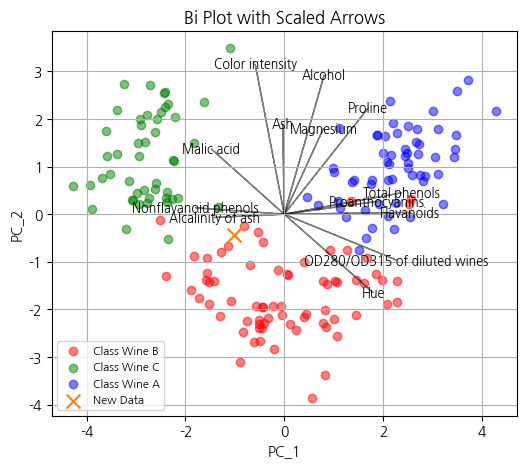

In [40]:
##  Bi Plot
plt.figure(figsize = (6, 5))
colors = ['r', 'g', 'b']  #
for i, target in enumerate(pca_df['Class'].unique()):
    plt.scatter(pca_df.loc[pca_df['Class'] == target, 'PC_1'],
                           pca_df.loc[pca_df['Class'] == target, 'PC_2'],
                           label = f'Class {target}',
                           alpha =0.5,
                           color = colors[i])
plt.xlabel('PC_1')
plt.ylabel('PC_2')
scaling_factor =6
for i, (var, pc1, pc2) in enumerate(zip(X.columns, pca.components_[0], pca.components_[1])):
        plt.arrow(0, 0, pc1 * scaling_factor, pc2 * scaling_factor,
                            color = 'black',
                            alpha = 0.5)
        plt.text(pc1 * scaling_factor, pc2 * scaling_factor, var,
                        ha = 'center',
                        va = 'center',
                        fontsize = 9)

## 새로운 데이터 확인
plt.scatter(new_data_pca[0, 0],
                      new_data_pca[0, 1],
                      color = 'C1',
                      marker = 'x',
                      s = 100,
                      label = 'New Data')
plt.title('Bi Plot with Scaled Arrows')
plt.legend(fontsize = 8)
plt.grid()
plt.show()


In [41]:
## 한글 폰트 깨짐 해결
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [42]:
rd = pd.read_csv("bank.csv",  encoding = 'cp949')
rd

,은행,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,현금배당수익률,현금배당성향(%)
0,신한은행,15.95,12.28,9.13,0.72,1164.91,1174.17,2.94,23.57
1,국민은행,10.24,8.52,10.18,0.82,1182.97,1564.67,3.03,23.15
2,우리은행,9.11,6.46,7.42,0.49,1438.04,509.19,3.61,26.71
3,하나은행,6.94,5.41,8.79,0.60,1350.34,1577.55,3.52,20.53
4,기업은행,12.07,8.98,7.98,0.57,1284.07,501.92,3.05,21.04
5,부산은행,12.33,8.82,5.82,0.45,1392.36,369.80,2.44,18.60
6,대구은행,11.24,8.68,7.97,0.57,1252.16,396.12,3.22,19.03
7,제주은행,16.16,12.05,6.79,0.47,1274.24,265.86,1.40,8.80
8,전북은행,15.18,11.54,7.86,0.57,1242.05,299.05,1.65,8.26


In [43]:
data = rd

     은행  영업이익률   순이익률  ROE(%)  ROA(%)     부채비율    자본유보율  현금배당수익률  현금배당성향(%)
0  신한은행  15.95  12.28    9.13    0.72  1164.91  1174.17     2.94      23.57
1  국민은행  10.24   8.52   10.18    0.82  1182.97  1564.67     3.03      23.15
(9, 9)
Explained Variance Ratio: [5.19327259e-01 3.72045468e-01 6.95691012e-02 2.58262084e-02
 7.20968704e-03 5.36977091e-03 6.21591677e-04 3.09131876e-05]
Cumulative Explained Variance Ratio: [0.51932726 0.89137273 0.96094183 0.98676804 0.99397772 0.9993475
 0.99996909 1.        ]


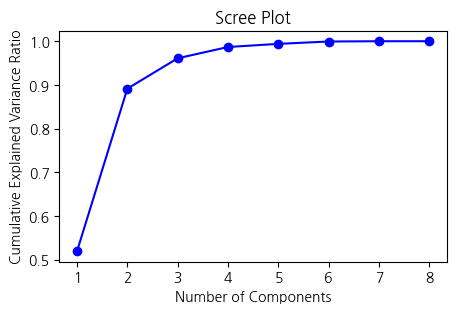

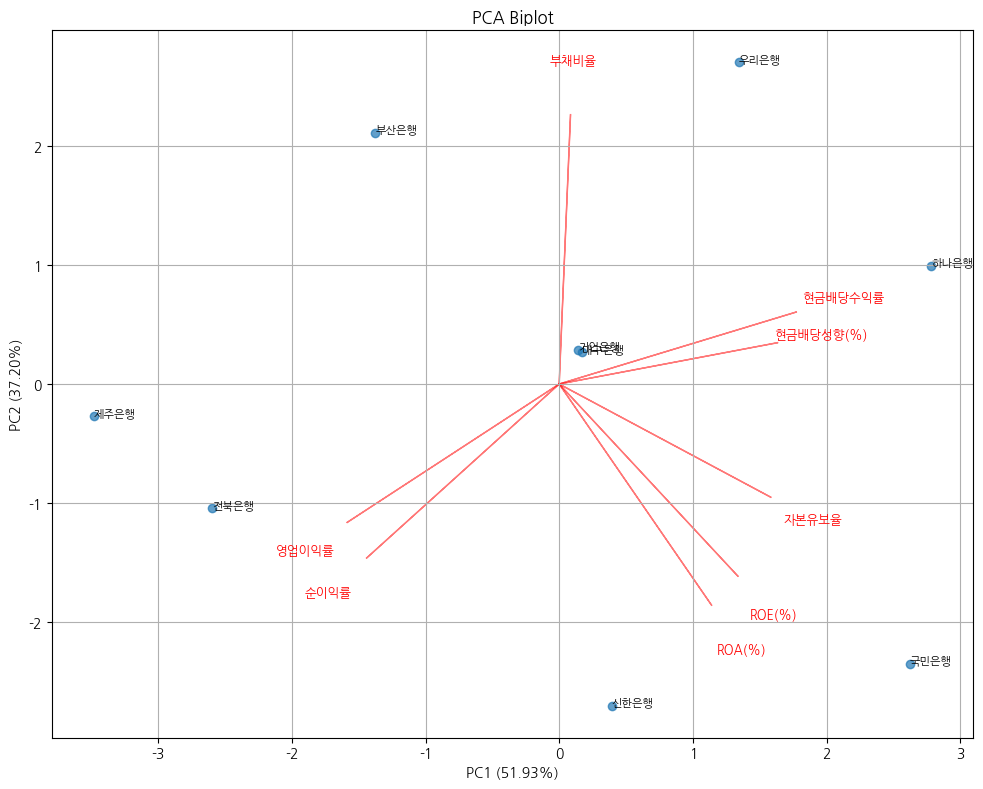

     은행  현금배당수익률
2  우리은행     3.61
3  하나은행     3.52
6  대구은행     3.22
4  기업은행     3.05
1  국민은행     3.03
0  신한은행     2.94
5  부산은행     2.44
8  전북은행     1.65
7  제주은행     1.40
     은행  ROA(%)
1  국민은행    0.82
0  신한은행    0.72
3  하나은행    0.60
4  기업은행    0.57
6  대구은행    0.57
8  전북은행    0.57
2  우리은행    0.49
7  제주은행    0.47
5  부산은행    0.45
     은행  영업이익률
7  제주은행  16.16
0  신한은행  15.95
8  전북은행  15.18
5  부산은행  12.33
4  기업은행  12.07
6  대구은행  11.24
1  국민은행  10.24
2  우리은행   9.11
3  하나은행   6.94
     은행     부채비율
2  우리은행  1438.04
5  부산은행  1392.36
3  하나은행  1350.34
4  기업은행  1284.07
7  제주은행  1274.24
6  대구은행  1252.16
8  전북은행  1242.05
1  국민은행  1182.97
0  신한은행  1164.91


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 데이터 로드
data = pd.read_csv("bank.csv", encoding = 'cp949')

# 데이터 확인
print(data.head(2))
print(data.shape)

# 전처리
processed_data = data.iloc[:,  1:]# .apply(lambda x: pd.to_numeric(x.str.replace(",",  ""), errors='coerce'))
processed_data.index = data.iloc[:, 0]

## PCA 수행
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# PCA 결과 요약
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance Ratio:", np.cumsum(pca.explained_variance_ratio_))

# PCA 개수 선택을 위한 스크리 플롯
plt.figure(figsize=(5, 3))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


##  Bi Plot
# Biplot 생성
plt.figure(figsize=(10, 8))

# 데이터 포인트 그리기
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)

# 은행 이름 표시
for i, bank in enumerate(data.iloc[:, 0]):
    plt.annotate(bank, (pca_result[i, 0], pca_result[i, 1]), fontsize=8)

# 변수 기여도 화살표 추가
scaling_factor = 4  # 화살표 길이를 조정하는 스케일링 팩터
for i, (var, pc1, pc2) in enumerate(zip(processed_data.columns, pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, pc1 * scaling_factor, pc2 * scaling_factor, color='red', alpha=0.5)
    plt.text(pc1 * scaling_factor * 1.2, pc2 * scaling_factor * 1.2, var,
             color='red', ha='center', va='center', fontsize=9)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.title('PCA Biplot')
plt.grid(True)
plt.tight_layout()
plt.show()



## 관측치별 정렬
print(data[['은행', '현금배당수익률']].sort_values('현금배당수익률', ascending=False))
print(data[['은행', 'ROA(%)']].sort_values('ROA(%)', ascending=False))
print(data[['은행', '영업이익률']].sort_values('영업이익률', ascending=False))
print(data[['은행', '부채비율']].sort_values('부채비율', ascending=False))

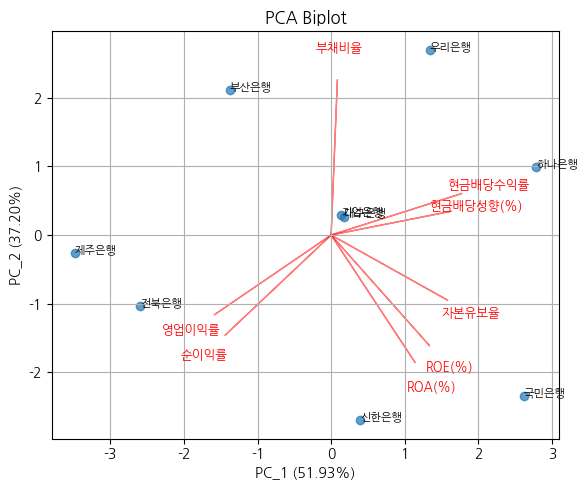

In [47]:
## 참고, 위에서 만든 함수 활용
create_pca_biplot(
                                  pca_result=pca_result,
                                  pca=pca,
                                  original_data=data,
                                  labels=data.iloc[:, 0],
                                  feature_names=processed_data.columns,
                                  scaling_factor=4,
                                  figsize=(6, 5),

)

## tSNE

#### 데이터 읽기

In [48]:
rd = pd.read_csv('mnist.csv')
rd

df = rd.copy()

In [49]:
df.shape

(10000, 785)

In [50]:
df.head(1)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df['label'].value_counts()

,count
label,
1,1095
2,1045
7,1039
3,1009
6,1003
9,995
0,991
4,967
8,950


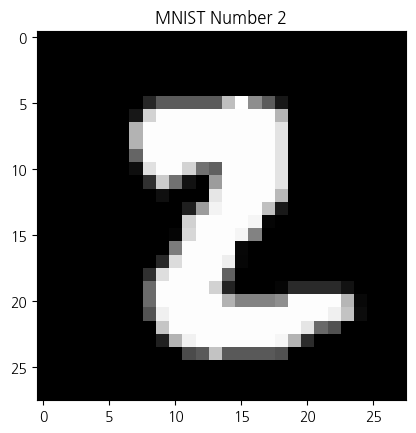

In [52]:
## MNIST 데이터 플롯
num = 2
index = df[df['label'] == num].index[0]
m = df.iloc[index, 1:].values.reshape(28, 28)  # 레이블을 제외한 픽셀 값만 사용
plt.imshow(m, cmap='gray')
plt.title(f"MNIST Number {num}")
plt.show()

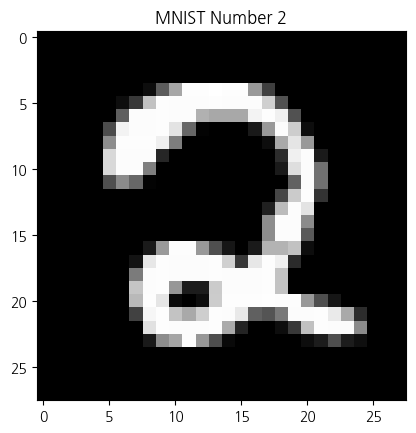

In [53]:
## MNIST 데이터 플롯
num = 2
index = df[df['label'] == num].index[10]
m = df.iloc[index, 1:].values.reshape(28, 28)  # 레이블을 제외한 픽셀 값만 사용
plt.imshow(m, cmap='gray')
plt.title(f"MNIST Number {num}")
plt.show()

In [54]:
## 데이터 크기 줄이기
np.random.seed(12345)

index = np.random.choice(df.index, 1000, replace=False)
mnist_sampled = df.loc[index]
mnist_sampled = mnist_sampled.reset_index(drop=True)
mnist_sampled

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
mnist_sampled.shape

(1000, 785)

In [56]:
mnist_sampled['label'].value_counts()

,count
label,
1,119
7,111
3,109
4,100
9,98
0,97
6,97
5,94
2,91


### t-SNE

In [57]:
from sklearn.manifold import TSNE

## t-SNE 적용
tsne_model = TSNE(n_components = 2, # 임베딩할 차원수
                                         perplexity = 30,  # 데이터 포인트 주변에서, 고려할 근접 이웃 수, 5 ~ 50
                                         n_iter = 500, # 최대 반복 횟수,
                                         # random_state = 1 # 랜덤시드
                                          )

tsne_ = tsne_model.fit_transform(mnist_sampled.iloc[:, 1:])  # 연속형 데이터 (레이블 컬럼 제외)
tsne_

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



array([[19.631712  , 29.285583  ],
       [17.981     ,  7.7214756 ],
       [ 4.8217173 , -9.056643  ],
       ...,
       [-0.68022317,  6.568521  ],
       [11.819898  , -5.8821497 ],
       [20.74972   ,  7.191197  ]], dtype=float32)

In [58]:
tsne_df = pd.DataFrame(tsne_,
                                                   columns = ['tsne1', 'tsne2'])
tsne_df['label'] = mnist_sampled['label']
tsne_df

,tsne1,tsne2,label
0,19.631712,29.285583,0
1,17.981001,7.721476,8
2,4.821717,-9.056643,8
3,-3.927258,29.180759,4
4,-11.816468,-13.166573,9
...,...,...,...
995,-22.713842,-9.049075,7
996,3.675184,11.905127,2
997,-0.680223,6.568521,6
998,11.819898,-5.882150,5


#### 시각화

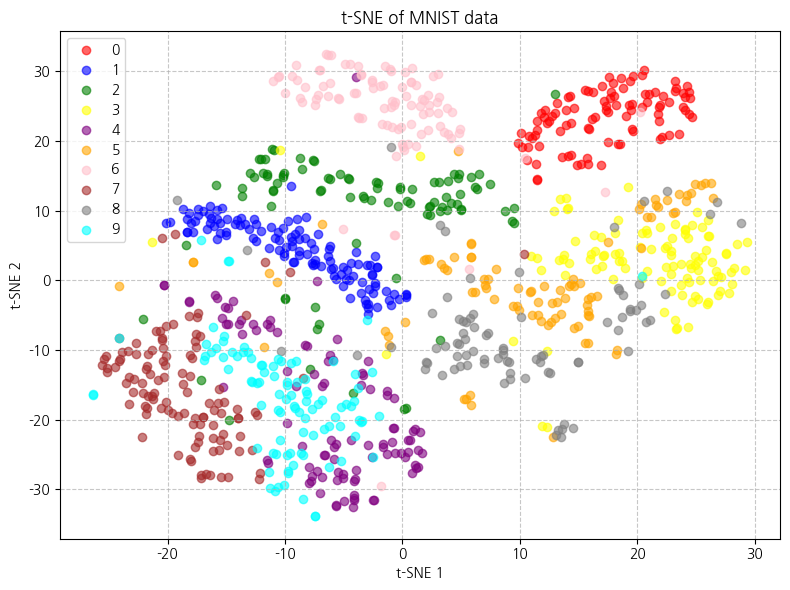

In [59]:
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan']

plt.figure(figsize=(8, 6))

for i in range(10):
    # 현재 클래스의 데이터 선택
    class_data = tsne_df[mnist_sampled['label'] == i]

    plt.scatter(class_data.iloc[:, 0],  # tsne_df의 첫 번째 주성분
                          class_data.iloc[:, 1],  # tsne_df의 두 번째 주성분
                          c = colors[i],
                          label = str(i),
                          alpha = 0.6)  # 투명도, 0에 가까울수록 투명

plt.title('t-SNE of MNIST data')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.grid(True,  linestyle = '--',  alpha = 0.7)
plt.tight_layout()
plt.show()

#### pca와 비교

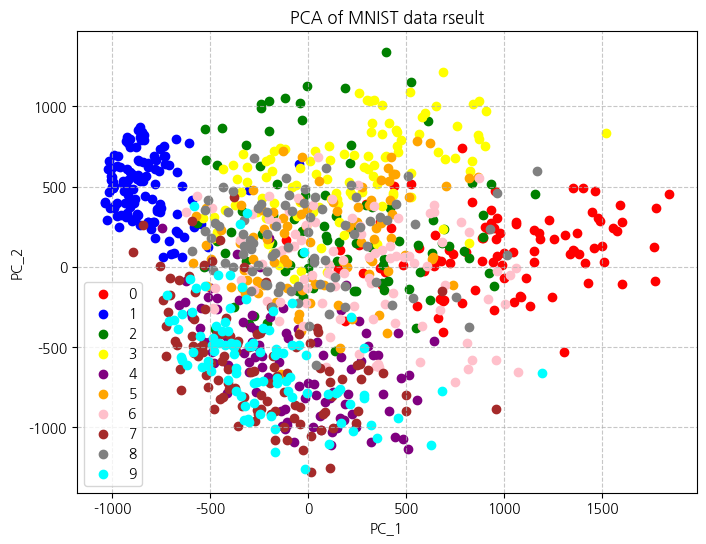

In [60]:
## PCA와 비교
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(mnist_sampled.iloc[:, 1:])  # 연속형 데이터 (레이블 제외)

## PCA 시각화
plt.figure(figsize=(8, 6))

for i in range(10):
    idx = mnist_sampled['label'] == i
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1],
                           color = colors[i],
                           label = str(i))
plt.title('PCA of MNIST data rseult')
plt.grid(True,  linestyle = '--',  alpha = 0.7)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.legend()
plt.show()

### 최적의 퍼플렉시티 찾기
- https://distill.pub/2016/misread-tsne/
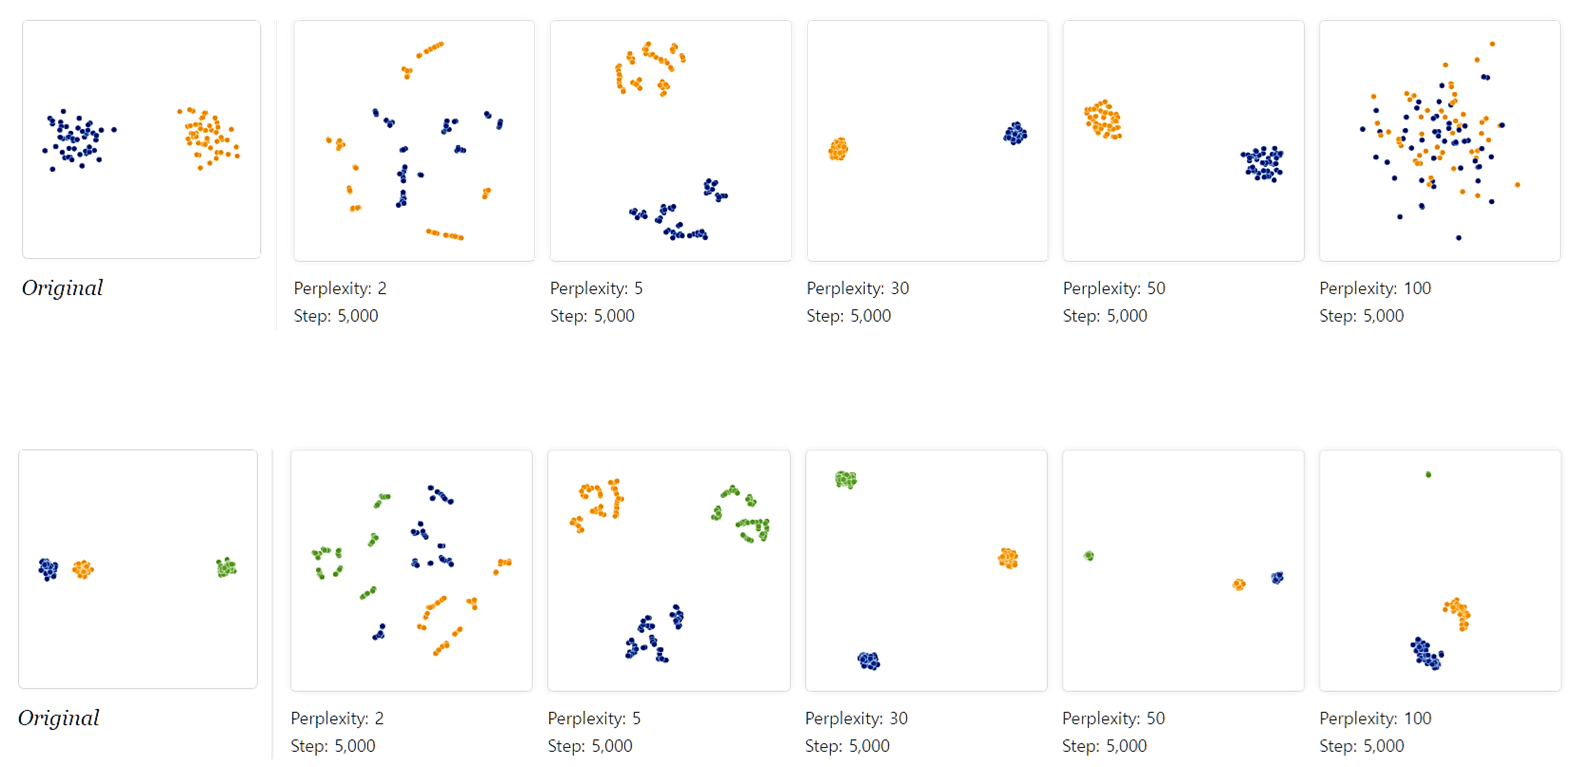

일반적인 가이드
- 경험적 범위 사용
 일반적으로 5에서 50 사이의 값을 사용  
  - 작은 perplexity는 작은 지역 밀도(세부적인 클러스터링)강조
  - 큰 perplexity는 더 큰 지역 밀도(큰 클러스터링)를 강조
- 데이터의 크기와 밀도 고려  
  - 작은 데이터셋(수백 개 샘플)에서는 낮은 perplexity
  - 큰 데이터셋에서는 높은 perplexity
-엘보우 방법(Elbow Method):
  - K-최근접 이웃 거리 플롯(K-Nearest Neighbors Distance Plot)을 사용하 최적의 eps를 찾는 방법처럼,  
     perplexity를 바꿔가며 그래프의 엘보우 지점 찾기

- 여러번 시도 후 가장 좋은 값으로 설정(데이터를 아는 경우!!)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed i

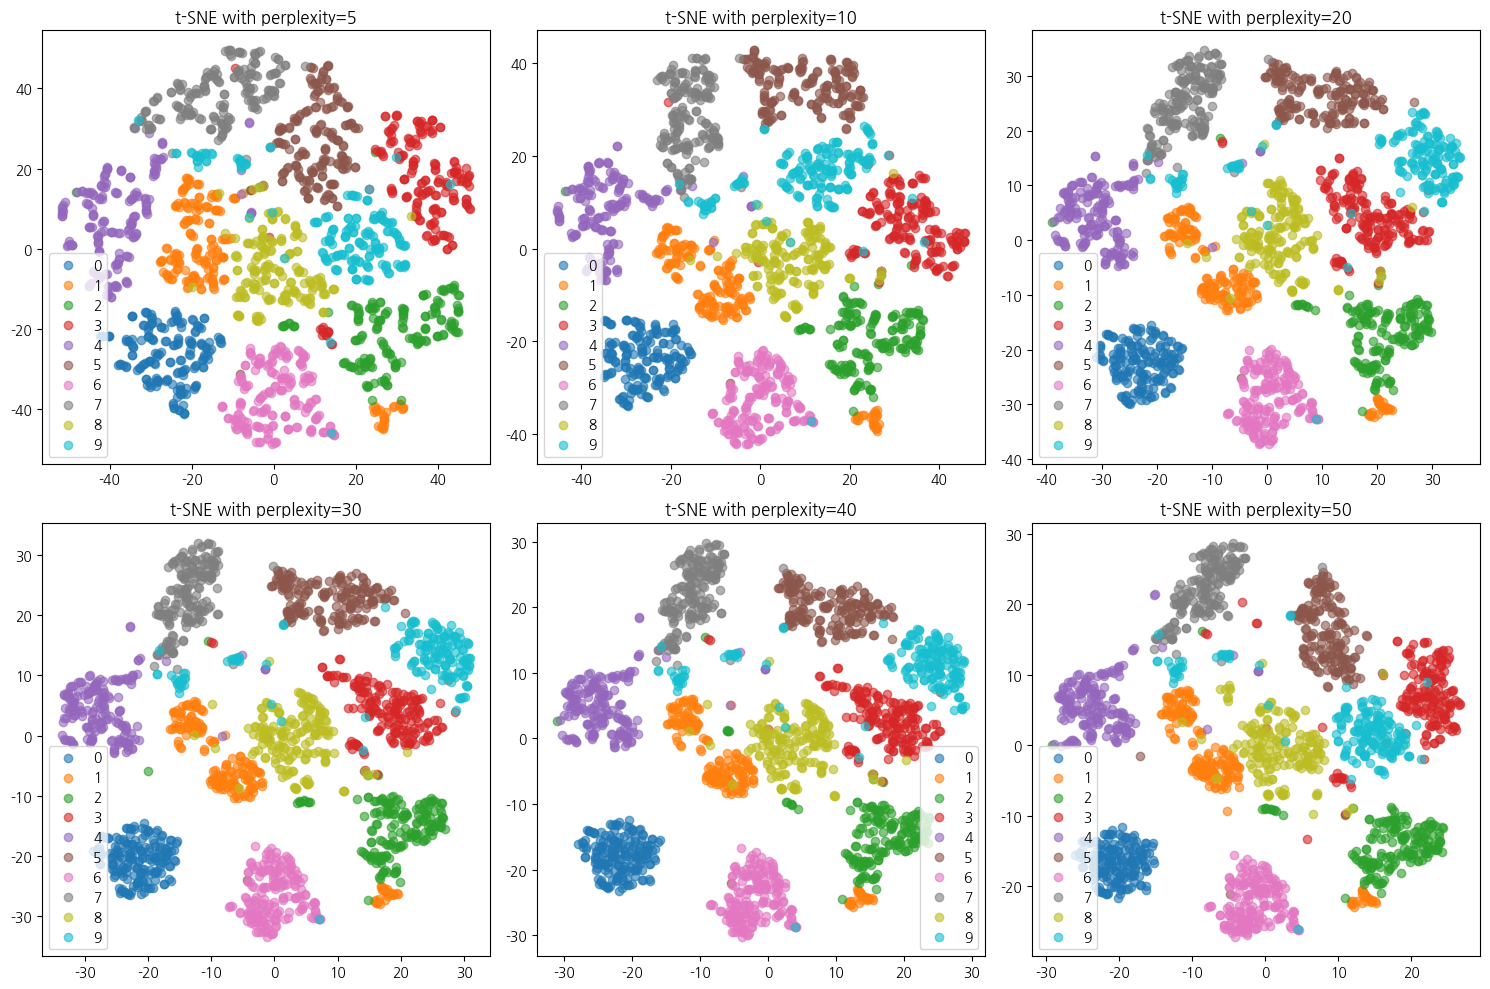

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

# MNIST 데이터 로드 (유사 데이터셋 사용)
mnist = load_digits()
X = mnist.data
y = mnist.target

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 여러 perplexity 값 설정
perplexities = [5, 10, 20, 30, 40, 50]

# 여러 perplexity 값에 대해 t-SNE 결과 시각화
plt.figure(figsize = (15, 10))
for i, perplexity in enumerate(perplexities):
    tsne_model = TSNE(n_components = 2,
                                              perplexity = perplexity,
                                              n_iter = 500,
                                              random_state = 1234
                                               )
    X_tsne = tsne_model.fit_transform(X_scaled)

    plt.subplot(2, 3, i + 1)  # 서브플롯 행과 열 설정
    for j in range(10):
        plt.scatter(X_tsne[y == j, 0], X_tsne[y == j, 1], label=str(j), alpha=0.6)
    plt.title("t-SNE with perplexity=" + str(perplexity))
    plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



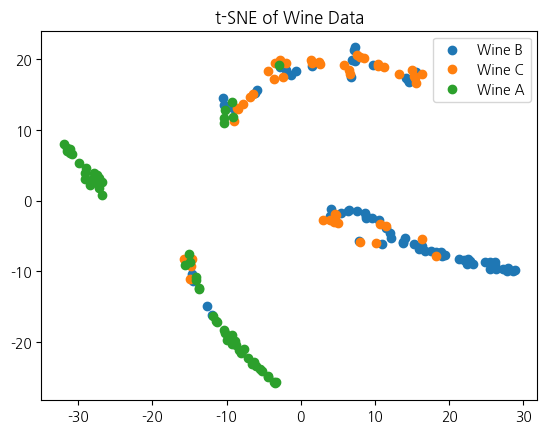

In [62]:
## 참고 t-SNE 시각화 (와인 데이터)
tsne_model_wine = TSNE(n_components = 2,
                                                      perplexity = 10,
                                                      n_iter = 500,
                                                      # random_state = 1
                                                        )

t_wine = tsne_model_wine.fit_transform(wine_data.iloc[:, :-1])  # 연속형 데이터 (클래스 제외)


plt.figure()
for class_label in wine_data['Class'].unique():
    idx = wine_data['Class'] == class_label

    plt.scatter(t_wine[idx, 0],
                           t_wine[idx, 1],
                           label = class_label)
plt.title('t-SNE of Wine Data')
plt.legend()
plt.show()

In [63]:
# EOS